In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
solar_df   = pd.read_csv("Data_Cacak.csv",index_col='Datetime',parse_dates=True)
solar_df.head()

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2022-11-22 14:00:00,8.7,59,117,0.0,0,117,11.705333,12.694917,16.355417
2022-11-22 15:00:00,8.9,62,62,0.0,0,62,1.309583,8.262333,1.812333
2022-11-22 16:00:00,9.2,57,15,7.0,1,16,0.000000,0.930667,0.000000
2022-11-22 17:00:00,8.9,81,0,0.0,0,0,0.000000,0.000000,0.000000
2022-11-22 18:00:00,8.9,91,0,0.0,0,0,0.000000,0.000000,0.000000


<Axes: xlabel='Datetime'>

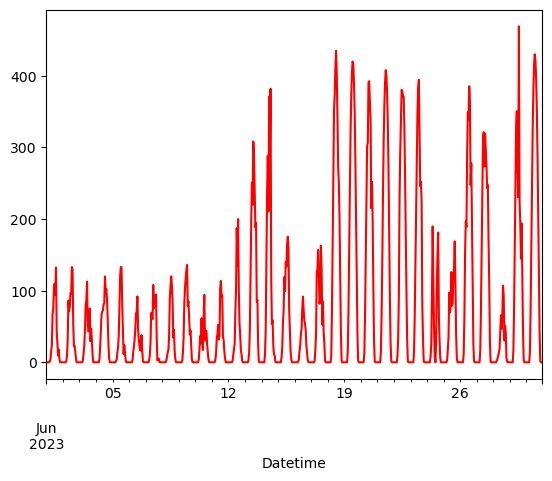

In [5]:
jun_2023_data = solar_df.loc['2023-6']
jun_2023_data['Production - Location 1'].plot(color='red')

<Axes: xlabel='Datetime'>

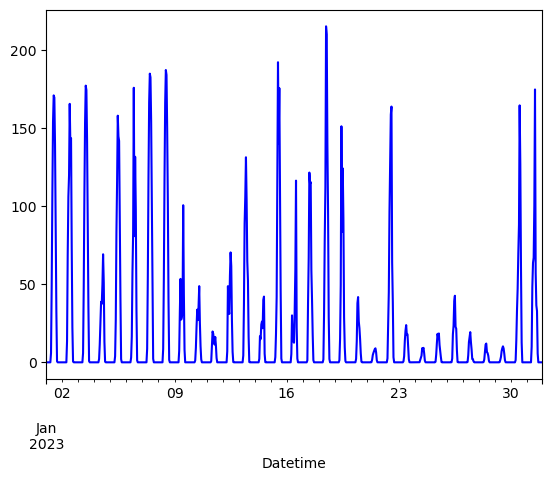

In [7]:
jan_2023_data = solar_df.loc['2023-1']
jan_2023_data['Production - Location 1'].plot(color='blue')

In [9]:
prev_time = solar_df.index[0]


for current_time in solar_df.index[1:]:
    expected_time = prev_time + pd.Timedelta(hours=1)
    
    if current_time != expected_time:
        print(f"Missing hour detected between {prev_time} and {current_time}")
        print(f"Expected {expected_time}, found {current_time}")
    
    prev_time = current_time

Missing hour detected between 2023-03-26 01:00:00 and 2023-03-26 03:00:00
Expected 2023-03-26 02:00:00, found 2023-03-26 03:00:00
Missing hour detected between 2023-10-29 02:00:00 and 2023-10-29 02:00:00
Expected 2023-10-29 03:00:00, found 2023-10-29 02:00:00


In [11]:
# 1. First ensure your index is datetime type
solar_df.index = pd.to_datetime(solar_df.index)

# 2. Localize to Serbia's timezone (Europe/Belgrade)
solar_df.index = solar_df.index.tz_localize('Europe/Belgrade', 
                                          ambiguous='infer',  # Handles duplicate 02:00 hour in fall
                                          nonexistent='shift_forward')  # Handles missing 02:00 in spring

# 3. Now convert to UTC
solar_df.index = solar_df.index.tz_convert('UTC')

# Verify the results
solar_df.loc['2023-03-26 00:00':'2023-03-26 03:00'].head()  # Spring transition

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2023-03-26 00:00:00+00:00,8.4,0,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 01:00:00+00:00,6.0,3,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 02:00:00+00:00,4.9,0,0,0.0,0,0,0.0,0.0,0.0
2023-03-26 03:00:00+00:00,4.2,0,0,0.0,0,0,0.0,0.0,0.0


In [13]:
solar_df.loc['2023-10-29 00:00':'2023-10-29 03:00'].head()  # Fall transition

,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Location 1,Production - Location 2,Production - Location 3
Datetime,,,,,,,,,
2023-10-29 00:00:00+00:00,9.5,28,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 01:00:00+00:00,9.5,36,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 02:00:00+00:00,9.3,10,0,0.0,0,0,0.0,0.0,0.0
2023-10-29 03:00:00+00:00,8.5,0,0,0.0,0,0,0.0,0.0,0.0


#### check for messing data an other time

In [16]:
prev_time = solar_df.index[0]

# Iterate through the index to check continuity
for current_time in solar_df.index[1:]:
    expected_time = prev_time + pd.Timedelta(hours=1)
    
    if current_time != expected_time:
        print(f"Missing hour detected between {prev_time} and {current_time}")
        print(f"Expected {expected_time}, found {current_time}")
    
    prev_time = current_time

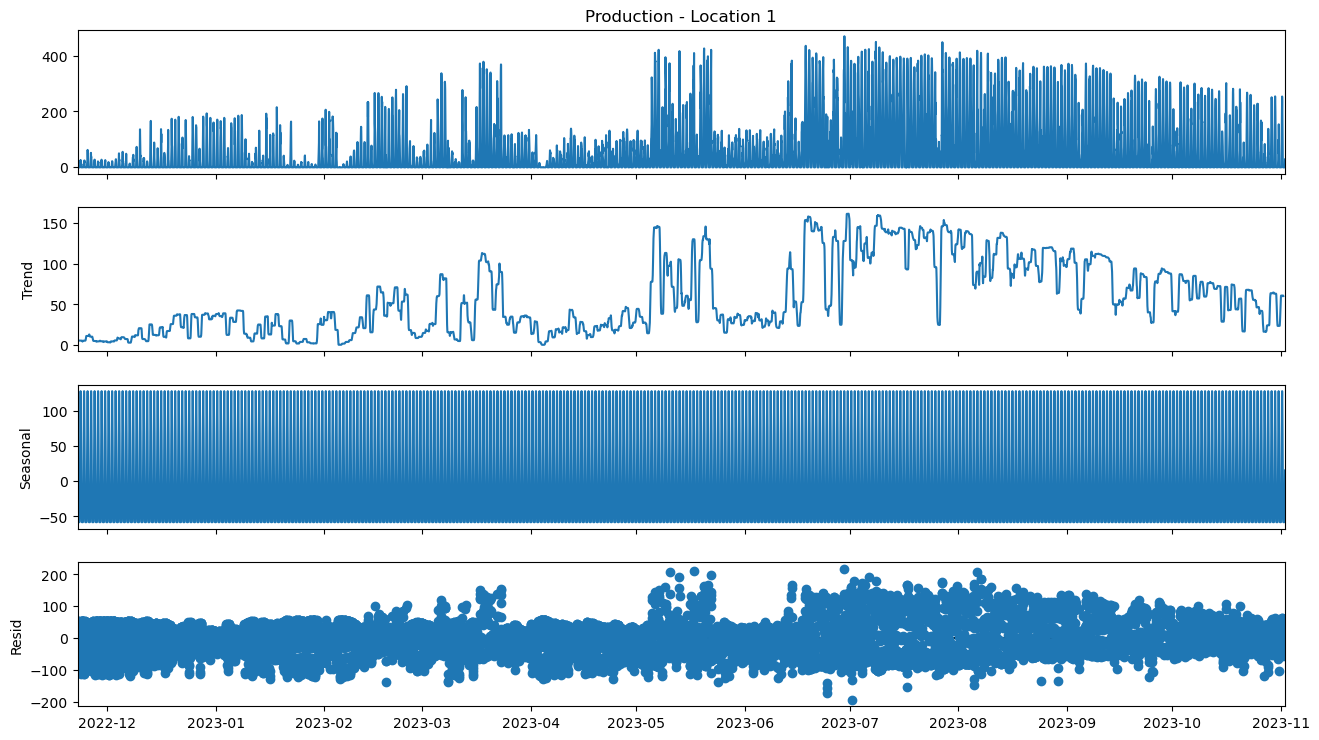

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# plt.close('all')
results = seasonal_decompose(solar_df['Production - Location 1'])
results.plot()
plt.gcf().set_size_inches(15, 8)  # gcf = "Get Current Figure"
# plt.tight_layout()
plt.show()

In [20]:
solar_df.size

74466

In [22]:
solar_df['time']=solar_df.index.hour
# solar_df['time']=solar_df['time'].apply(lambda x: x.timestamp())
X=solar_df[['time','AirTemperature',	'CloudOpacity',	'DHI',	'DNI','EBH','GHI']]
Y=solar_df['Production - Location 1']

test_size = 0.2
split_index = int(len(X) * (1 - test_size))


X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

# To see the number of lines in each sample
print(f"Taille de X_train: {len(X_train)}, Taille de X_test: {len(X_test)}")
print(f"Taille de y_train: {len(y_train)}, Taille de y_test: {len(y_test)}")

Taille de X_train: 6619, Taille de X_test: 1655
Taille de y_train: 6619, Taille de y_test: 1655


# Applying SVR model without scaling data

In [27]:
from sklearn.svm import SVR

In [29]:
svr_rbf = SVR(kernel='rbf', C=50, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=50, gamma=0.1)

In [31]:
y_pred = svr_rbf.predict(X_test)

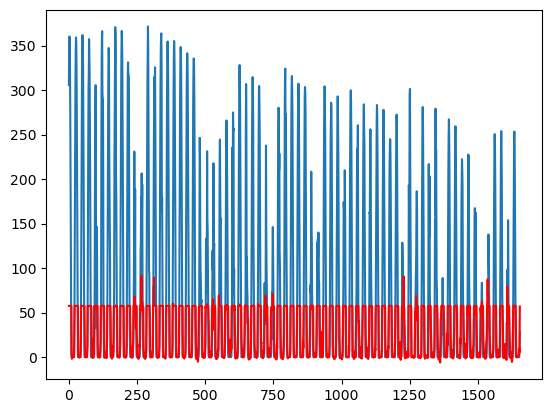

In [33]:
y_test_l = list(y_test)
plt.plot(y_test_l, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Mean Absolute Error) : {mae:.4f}")
print(f"MSE (Mean Squared Error) : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score: {r2:.2f}")

MAE (Mean Absolute Error) : 55.5426
MSE (Mean Squared Error) : 9594.1476
RMSE (Root Mean Squared Error) : 97.9497
R² Score: 0.13


# Normalize data before applying RFR

In [38]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

In [40]:
svr_rbf = SVR(kernel='rbf', C=50, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)

SVR(C=50, gamma=0.1)

In [48]:
y_pred = svr_rbf.predict(X_test_scaled)

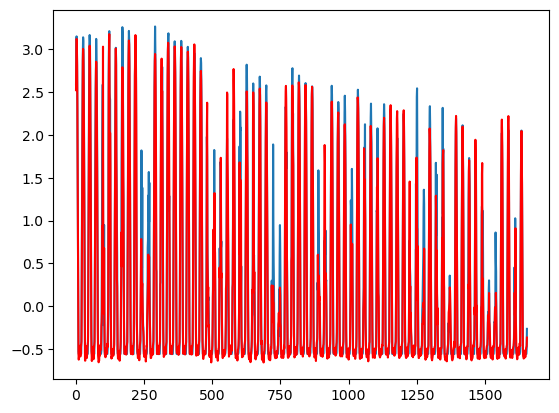

In [50]:
y_test_l = list(y_test_scaled)
plt.plot(y_test_l, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"MAE (Mean Absolute Error) : {mae:.4f}")
print(f"MSE (Mean Squared Error) : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score: {r2:.2f}")

MAE (Mean Absolute Error) : 0.1345
MSE (Mean Squared Error) : 0.0696
RMSE (Root Mean Squared Error) : 0.2639
R² Score: 0.94
